In [ ]:
!pip install gensim


In [ ]:
from gensim.models import Word2Vec

ds = """The work was intended to be in shades of white, but this colour was associated with death, so it was changed to grey. 
The Art Review Panel was concerned that the work would reference the Nicoll Highway collapse. Keeping the ambiguity of the artwork,
 the new colour complements the grey scheme of the station architecture.[57][59] During the artwork's production, there were concerns
  over the uneven backing of the material, which caused the colour shading to not "come out right". With Khiew's closer involvement in 
  the production process, this problem was later resolved. The station architects were concerned that the "pretty" figures would clash 
  with the station's futuristic architecture, but Khiew felt that the contrast emphasised his intention of capturing the commuter's attention.[60] 
  It was initially intended for his work to be spread across the platforms' entire length above the screen doors to represent the highway. However, this idea would have hindered maintenance works for the cables running above the doors. Hence, the work was limited to four places above the platforms,
 which Khiew took as a challenge to "communicate with less".[56] Khiew hoped that commuters would gain different perspectives from his
  work while encouraging them to be open-minded"""


corpus = ds.split(" ")

converted_corpus = list()

itr = 0 

gap = 8

while(itr<len(ds)):
  converted_corpus.append(corpus[itr:itr+gap])
  itr+=gap

print(converted_corpus)



[['The', 'work', 'was', 'intended', 'to', 'be', 'in', 'shades'], ['of', 'white,', 'but', 'this', 'colour', 'was', 'associated', 'with'], ['death,', 'so', 'it', 'was', 'changed', 'to', 'grey.', '\nThe'], ['Art', 'Review', 'Panel', 'was', 'concerned', 'that', 'the', 'work'], ['would', 'reference', 'the', 'Nicoll', 'Highway', 'collapse.', 'Keeping', 'the'], ['ambiguity', 'of', 'the', 'artwork,\n', 'the', 'new', 'colour', 'complements'], ['the', 'grey', 'scheme', 'of', 'the', 'station', 'architecture.[57][59]', 'During'], ['the', "artwork's", 'production,', 'there', 'were', 'concerns\n', '', 'over'], ['the', 'uneven', 'backing', 'of', 'the', 'material,', 'which', 'caused'], ['the', 'colour', 'shading', 'to', 'not', '"come', 'out', 'right".'], ['With', "Khiew's", 'closer', 'involvement', 'in', '\n', '', 'the'], ['production', 'process,', 'this', 'problem', 'was', 'later', 'resolved.', 'The'], ['station', 'architects', 'were', 'concerned', 'that', 'the', '"pretty"', 'figures'], ['would', 'cl

In [ ]:
classifier = Word2Vec(converted_corpus, min_count=1,size= 50,workers=3, window =3, sg = 1)

In [ ]:
classifier['work']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.00725413, -0.00536315,  0.00749739, -0.00070971,  0.00672854,
       -0.00759407,  0.00367811, -0.00283993, -0.00644626, -0.0095767 ,
        0.00604631, -0.00799289,  0.00717703,  0.00928622,  0.00967109,
       -0.00567331,  0.0044883 , -0.00256444, -0.00892147,  0.00974586,
        0.00721597, -0.00307379,  0.00546501, -0.00289959,  0.00487076,
        0.00946509, -0.00508856, -0.00430018,  0.00331663,  0.00147818,
       -0.00270342,  0.0041392 ,  0.00272827,  0.00075847, -0.00714997,
       -0.00083999, -0.00679868, -0.00577563,  0.00940421,  0.00039317,
       -0.00350337, -0.00863542,  0.0061079 ,  0.00203444, -0.00700921,
        0.00218028,  0.00263826,  0.00677828,  0.00070277,  0.00683553],
      dtype=float32)

In [ ]:
print("Similarity between 'work and 'problem''")
classifier.similarity('work','problem')

Similarity between 'work and 'problem''


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


-0.12621683

In [ ]:
most_similar = classifier.most_similar('work')[:10]

print("Most Frequent word related to 'work'")
for item in most_similar:
  print(f"{item[0]} ----> {item[1]}")

Most Frequent word related to 'work'
"come ----> 0.376380056142807
production, ----> 0.2758882939815521

The ----> 0.27371683716773987
as ----> 0.2735029458999634
production ----> 0.26738569140434265
them ----> 0.24726638197898865
Panel ----> 0.23647485673427582
doors ----> 0.19663845002651215
figures ----> 0.1919366717338562
but ----> 0.18875735998153687


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
c_sv = []

with open('Dataset.csv','r',encoding='ISO-8859-1') as f:
  a = f.readlines()
  c_sv = [[_.lower() for _ in l.split(',')] for l in a]

train_X = [i[1] for i in c_sv[10:]]
train_y = [i[0] for i in c_sv[10:]]
test_X = [i[1] for i in c_sv[1:10]]
test_y = [i[0] for i in c_sv[1:10]]
print(train_X)
print(train_y)

['had your mobile 11 months or more? u r entitled to update to the latest colour mobiles with camera for free! call the mobile update co free on 08002986030', '"i\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight', '"six chances to win cash! from 100 to 20', '"urgent! you have won a 1 week free membership in our æ¾¹100', "i've been searching for the right words to thank you for this breather. i promise i wont take your help for granted and will fulfil my promise. you have been wonderful and a blessing at all times.", 'i have a date on sunday with will!!', '"xxxmobilemovieclub: to use your credit', "oh k...i'm watching here:)", 'eh u remember how 2 spell his name... yes i did. he v naughty make until i v wet.', 'fine if thaté\x80\xads the way u feel. thaté\x80\xads the way its gota b', '"england v macedonia - dont miss the goals/team news. txt ur national team to 87077 eg england to 87077 try:wales', 'is that seriously how you spell his name?', 'iå£½é±© go

['spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham"""', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'sp

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* a

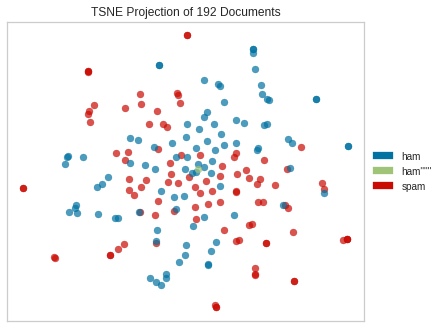

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import TSNEVisualizer


tfidf = TfidfVectorizer()

X = tfidf.fit_transform(train_X)
y = train_y

tsne = TSNEVisualizer()
print(y)

tsne.fit(X, y)
tsne.show()